In [1]:
'''
###### DO NOT EDIT ######
(Scroll down for start of the assignment)

# MATLAB Code:
# Alexey S. Sokolov a.k.a. nICKEL, Moscow, Russia
# June 2007
# alex.nickel@gmail.com

Zig-zag section
'''

import numpy as np

# Zigzag scan of a matrix

# --INPUT--
# Argument: 2D matrix of any size, not strictly square

# --OUTPUT--
# Returns: 1-by-(m*n) array, where input matrix is m*n

def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    vmax = input.shape[0]
    hmax = input.shape[1]

    #print(vmax ,hmax )

    i = 0

    output = np.zeros(( vmax * hmax))
    #----------------------------------

    while ((v < vmax) and (h < hmax)):

        if ((h + v) % 2) == 0:                 # going up

            if (v == vmin):
                #print(1)
                output[i] = input[v, h]        # if we got to the first line

                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1

                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
                #print(2)
                output[i] = input[v, h]
                v = v + 1
                i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
                #print(3)
                output[i] = input[v, h]
                v = v - 1
                h = h + 1
                i = i + 1


        else:                                    # going down

            if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
                #print(4)
                output[i] = input[v, h]
                h = h + 1
                i = i + 1

            elif (h == hmin):                  # if we got to the first column
                #print(5)
                output[i] = input[v, h]

                if (v == vmax -1):
                    h = h + 1
                else:
                    v = v + 1

                i = i + 1

            elif ((v < vmax -1) and (h > hmin)):     # all other cases
                #print(6)
                output[i] = input[v, h]
                v = v + 1
                h = h - 1
                i = i + 1


        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
            #print(7)
            output[i] = input[v, h]
            break

    #print ('v:',v,', h:',h,', i:',i)
    return output


# Inverse zigzag scan of a matrix

# --INPUT--
# Argument: 1-by-m*n array, m & n are vertical & horizontal sizes of output matrix

# --OUTPUT--
# Returns: a 2D matrix of defined sizes with input array items gathered by zigzag

def inverse_zigzag(input, vmax, hmax):

    #print input.shape

    # initializing the variables
    #----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    output = np.zeros((vmax, hmax))

    i = 0
    #----------------------------------

    while ((v < vmax) and (h < hmax)):
        #print ('v:',v,', h:',h,', i:',i)
        if ((h + v) % 2) == 0:                 # going up

            if (v == vmin):
                #print(1)

                output[v, h] = input[i]        # if we got to the first line

                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1

                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
                #print(2)
                output[v, h] = input[i]
                v = v + 1
                i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
                #print(3)
                output[v, h] = input[i]
                v = v - 1
                h = h + 1
                i = i + 1


        else:                                    # going down

            if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
                #print(4)
                output[v, h] = input[i]
                h = h + 1
                i = i + 1

            elif (h == hmin):                  # if we got to the first column
                #print(5)
                output[v, h] = input[i]
                if (v == vmax -1):
                    h = h + 1
                else:
                    v = v + 1
                i = i + 1

            elif((v < vmax -1) and (h > hmin)):     # all other cases
                output[v, h] = input[i]
                v = v + 1
                h = h - 1
                i = i + 1


        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
            #print(7)
            output[v, h] = input[i]
            break


    return output



# part1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


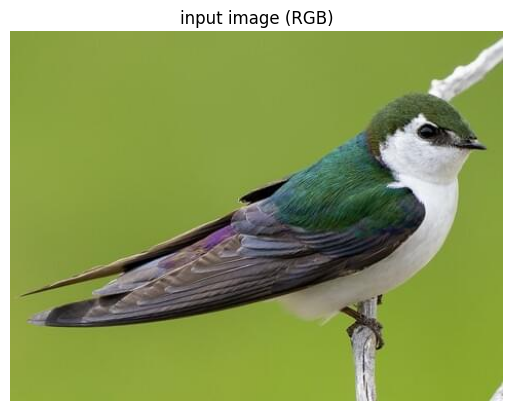

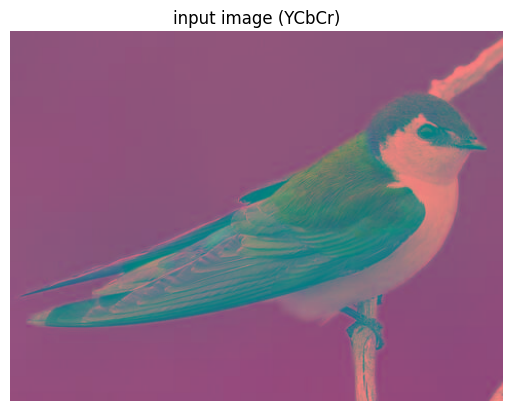

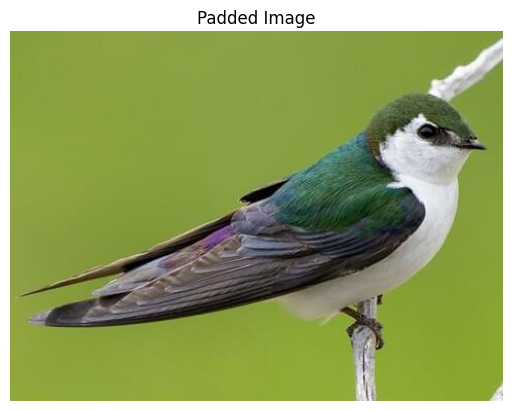

In [6]:
'''
######
Assignment 5 starts here
######
'''
# JPEG encoding

import numpy as np
# import scipy
import matplotlib.pyplot as plt
from skimage import io
from scipy.fftpack import dct,idct


# NOTE: Defining block size
block_size = 8

# TODO: Read image using skimage.io
file = '/content/drive/My Drive/cmput 206/assignment5/bird.jpg'
img = io.imread(file)

plt.imshow(img)
plt.title('input image (RGB)')
plt.axis('off')
plt.show()

# TODO: Convert the image from RGB space to YCbCr space
def rgb_to_ycbcr(rgb_image):
    ycbcr_image = np.zeros_like(rgb_image, dtype=np.float32)
    ycbcr_image[:,:,0] = 0.299 * rgb_image[:,:,0] + 0.587 * rgb_image[:,:,1] + 0.114 * rgb_image[:,:,2]
    ycbcr_image[:,:,1] = 128 - 0.168736 * rgb_image[:,:,0] - 0.331264 * rgb_image[:,:,1] + 0.5 * rgb_image[:,:,2]
    ycbcr_image[:,:,2] = 128 + 0.5 * rgb_image[:,:,0] - 0.418688 * rgb_image[:,:,1] - 0.081312 * rgb_image[:,:,2]
    return ycbcr_image

# Convert the RGB image to YCbCr space
img_ycbcr = rgb_to_ycbcr(img)

plt.imshow(np.uint8(img_ycbcr))
plt.title('input image (YCbCr)')
plt.axis('off')
plt.show()


'''
Interesting property: Separability

The separability property refers to the fact that a 2D DCT can be computed as the product of two 1D DCTs
applied along each dimension of the data independently. This means that a 2D DCT can be computed much more
efficiently as two 1D DCTs instead of directly computing the 2D transform.
'''

# TODO: Function to compute 2D Discrete Cosine Transform (DCT)
# Apply DCT with type 2 and 'ortho' norm parameters

def dct2D(x):
    result = dct(dct(x, axis=0, norm='ortho'), axis=1, norm='ortho')
    return result


# TODO: Get size of image
h, w, d = img.shape

# Compute the number of blocks (of size 8-by-8)
nbh = int(np.ceil(h / block_size))
nbw = int(np.ceil(w / block_size))

# Calculate the padded dimensions
H = nbh * block_size
W = nbw * block_size

# Create a numpy zero matrix with the size of H,W,3 called padded_img
padded_img = np.zeros((H, W, 3))

# Copy the values of img into padded_img[0:h,0:w,:]
padded_img[:h, :w, :] = img

# Display the padded image
plt.imshow(np.uint8(padded_img))
plt.title('Padded Image')
plt.axis('off')
plt.show()

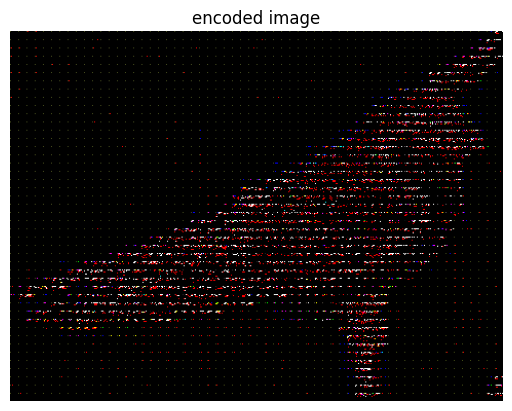

In [7]:
# TODO: Create the quantization matrix
# Refer to this https://www.sciencedirect.com/science/article/pii/S1742287608000285#:~:text=In%20the%20quantization%20stage%2C%20the,range%20from%200%20to%2065%2C535.&text=A%20lower%20number%20means%20that,higher%20quality%20image%20should%20result.
# Use Fig. 1 as your quantization tables (1 table for Y channel and 1 table for Cb and Cr channels)
quantization_matrix_Y = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                                  [12, 12, 14, 19, 26, 58, 60, 55],
                                  [14, 13, 16, 24, 40, 57, 69, 56],
                                  [14, 17, 22, 29, 51, 87, 80, 62],
                                  [18, 22, 37, 56, 68, 109, 103, 77],
                                  [24, 35, 55, 64, 81, 104, 113, 92],
                                  [49, 64, 78, 87, 103, 121, 120, 101],
                                  [72, 92, 95, 98, 112, 100, 103, 99]])
quantization_matrix_CbCr = np.array([[17, 18, 24, 47, 99, 99, 99, 99],
                                     [18, 21, 26, 66, 99, 99, 99, 99],
                                     [24, 26, 56, 99, 99, 99, 99, 99],
                                     [47, 66, 99, 99, 99, 99, 99, 99],
                                     [99, 99, 99, 99, 99, 99, 99, 99],
                                     [99, 99, 99, 99, 99, 99, 99, 99],
                                     [99, 99, 99, 99, 99, 99, 99, 99],
                                     [99, 99, 99, 99, 99, 99, 99, 99]])

# TODO: Initialize variables for compression calculations (only for the Y channel)
non_zero_before_quantization = 0
non_zero_after_quantization = 0
total_pixels = 0

# NOTE: Iterate over blocks
for i in range(nbh):

    # Compute start and end row indices of the block
    row_ind_1 = i * block_size
    row_ind_2 = row_ind_1 + block_size

    for j in range(nbw):

        # Compute start and end column indices of the block
        col_ind_1 = j * block_size
        col_ind_2 = col_ind_1 + block_size

        # TODO: Select current block to process using calculated indices (through slicing)
        Yblock = padded_img[row_ind_1:row_ind_2, col_ind_1:col_ind_2, 0]
        Cbblock = padded_img[row_ind_1:row_ind_2, col_ind_1:col_ind_2, 1]
        Crblock = padded_img[row_ind_1:row_ind_2, col_ind_1:col_ind_2, 2]

        # TODO: Apply dct2d() to selected block
        YDCT = dct2D(Yblock)
        CbDCT = dct2D(Cbblock)
        CrDCT = dct2D(Crblock)

        # TODO: Quantization
        # Divide each element of DCT block by corresponding element in quantization matrix
        quantized_YDCT = np.round(YDCT / quantization_matrix_Y)
        quantized_CbDCT = np.round(CbDCT / quantization_matrix_CbCr)
        quantized_CrDCT = np.round(CrDCT / quantization_matrix_CbCr)

        # TODO: Reorder DCT coefficients into block (use zigzag function)
        reordered_Y = zigzag(quantized_YDCT)
        reordered_Cb = zigzag(quantized_CbDCT)
        reordered_Cr = zigzag(quantized_CrDCT)

        # TODO: Reshape reordered array to 8-by-8 2D block
        reshaped_Y = np.reshape(reordered_Y, (block_size, block_size))
        reshaped_Cb = np.reshape(reordered_Cb, (block_size, block_size))
        reshaped_Cr = np.reshape(reordered_Cr, (block_size, block_size))

        # TODO: Copy reshaped matrix into padded_img on current block corresponding indices
        padded_img[row_ind_1:row_ind_2, col_ind_1:col_ind_2, 0] = reshaped_Y
        padded_img[row_ind_1:row_ind_2, col_ind_1:col_ind_2, 1] = reshaped_Cb
        padded_img[row_ind_1:row_ind_2, col_ind_1:col_ind_2, 2] = reshaped_Cr

        # TODO: Compute pixel locations with non-zero values before and after quantization (only in Y channel)
        # TODO: Compute total number of pixels
        non_zero_before_quantization += np.count_nonzero(YDCT)
        non_zero_after_quantization += np.count_nonzero(quantized_YDCT)
        total_pixels += block_size * block_size

plt.imshow(np.uint8(padded_img))
plt.title('encoded image')
plt.axis('off')
plt.show()

In [8]:
# NOTE: Write h, w, c, block_size and padded_img into .txt files at the end of encoding

# TODO: Write padded_img into 'encoded.npy' file (use np.save() function)
# First parameter should be 'encoded.npy'
np.save('encoded.npy', padded_img)

# TODO: write [h, w, c, block_size] into size.txt
# First parameter should be 'size.txt' (use np.savetxt() function)
np.savetxt('size.txt', [h, w, d, block_size])

# TODO: Calculate percentage of pixel locations with non-zero values before and after to measure degree of compression
total_pixels_before = h * w
non_zero_pixels_before = np.count_nonzero(img)
non_zero_pixels_after = np.count_nonzero(padded_img)
compression_ratio = (1 - non_zero_pixels_after / non_zero_pixels_before) * 100
# Print statements as shown in eClass
print("Degree of compression: {:.2f}%".format(compression_ratio))

Degree of compression: 94.11%


In [9]:
# Calculate percentage of pixel locations with non-zero values before compression
total_pixels_before = h * w * d
non_zero_pixels_before = np.count_nonzero(img)
percentage_non_zero_before = (non_zero_pixels_before / total_pixels_before) * 100

# Calculate percentage of pixel locations with non-zero values after compression
non_zero_pixels_after = np.count_nonzero(padded_img)
percentage_non_zero_after = (non_zero_pixels_after / total_pixels_before) * 100

# Calculate compression ratio
compression_ratio = (1 - non_zero_pixels_after / non_zero_pixels_before) * 100

# Print statements
print("Percentage of non-zero pixel locations before compression: {:.2f}%".format(percentage_non_zero_before))
print("Percentage of non-zero pixel locations after compression: {:.2f}%".format(percentage_non_zero_after))
print("Compression ratio: {:.2f}%".format(compression_ratio))


Percentage of non-zero pixel locations before compression: 99.83%
Percentage of non-zero pixel locations after compression: 5.88%
Compression ratio: 94.11%


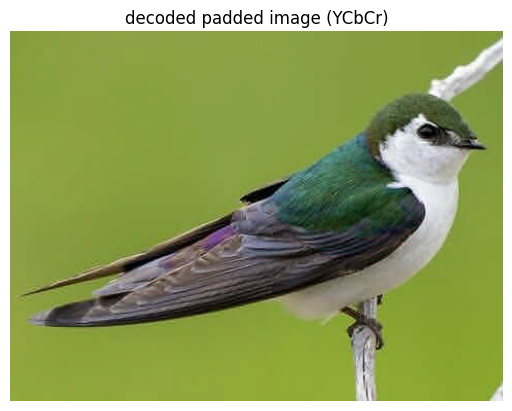

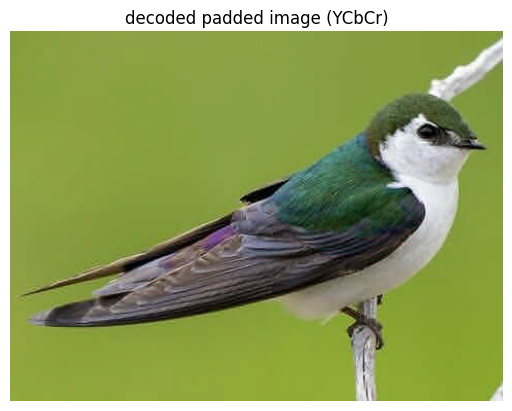

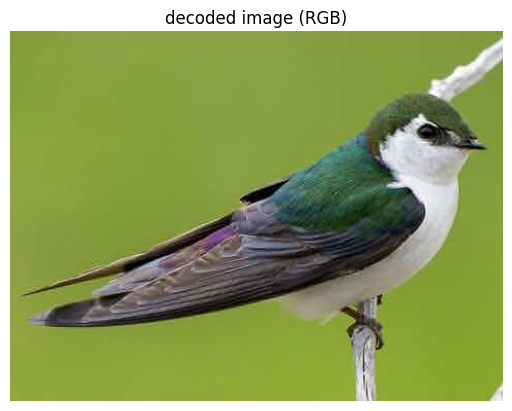

In [11]:

# JPEG decoding

import numpy as np
# import scipy
import matplotlib.pyplot as plt
from skimage import io
from scipy.fftpack import dct,idct

# NOTE: Defining block size
block_size = 8

# TODO: Function to compute 2D Discrete Cosine Transform (DCT)
# Apply IDCT with type 2 and 'ortho' norm parameters

def idct2D(x):
    result = idct(idct(x, axis=0, norm='ortho'), axis=1, norm='ortho')
    return result


# TODO: Load 'encoded.npy' into padded_img (using np.load() function)
padded_img = np.load('encoded.npy')

# TODO: Load h, w, c, block_size and padded_img from the size.txt file
with open('size.txt', 'r') as file:
    lines = file.readlines()
    h, w, c, block_size = map(int, map(float, lines))
    h, w, c, block_size = int(h), int(w), int(c), int(block_size)

# TODO: 6. Get size of padded_img, cast to int if needed


# TODO: Create the quantization matrix (Same as before)
quantization_matrix_Y = np.array([[16, 11, 10, 16, 24, 40, 51, 61],
                                  [12, 12, 14, 19, 26, 58, 60, 55],
                                  [14, 13, 16, 24, 40, 57, 69, 56],
                                  [14, 17, 22, 29, 51, 87, 80, 62],
                                  [18, 22, 37, 56, 68, 109, 103, 77],
                                  [24, 35, 55, 64, 81, 104, 113, 92],
                                  [49, 64, 78, 87, 103, 121, 120, 101],
                                  [72, 92, 95, 98, 112, 100, 103, 99]])

quantization_matrix_CbCr = np.array([[17, 18, 24, 47, 99, 99, 99, 99],
                                      [18, 21, 26, 66, 99, 99, 99, 99],
                                      [24, 26, 56, 99, 99, 99, 99, 99],
                                      [47, 66, 99, 99, 99, 99, 99, 99],
                                      [99, 99, 99, 99, 99, 99, 99, 99],
                                      [99, 99, 99, 99, 99, 99, 99, 99],
                                      [99, 99, 99, 99, 99, 99, 99, 99],
                                      [99, 99, 99, 99, 99, 99, 99, 99]])

# TODO: Compute number of blocks (of size 8-by-8), cast to int
nbh = int(np.ceil(h / block_size))
nbw = int(np.ceil(w / block_size))

# TODO: iterate over blocks
for i in range(nbh):

        # Compute start and end row indices of the block
        row_ind_1 = i * block_size

        row_ind_2 = row_ind_1 + block_size

        for j in range(nbw):

            # Compute start and end column indices of the block
            col_ind_1 = j * block_size

            col_ind_2 = col_ind_1 + block_size

            # TODO: Select current block to process using calculated indices
            Yblock = padded_img[row_ind_1:row_ind_2, col_ind_1:col_ind_2, 0]
            Cbblock = padded_img[row_ind_1:row_ind_2, col_ind_1:col_ind_2, 1]
            Crblock = padded_img[row_ind_1:row_ind_2, col_ind_1:col_ind_2, 2]

            # TODO: Reshape 8-by-8 2D block to 1D array
            Yreshaped = Yblock.flatten()
            Cbreshaped = Cbblock.flatten()
            Crreshaped = Crblock.flatten()

            # TODO: Reorder array into block (use inverse_zigzag function)
            Yreordered = inverse_zigzag(Yreshaped, block_size, block_size)
            Cbreordered = inverse_zigzag(Cbreshaped, block_size, block_size)
            Crreordered = inverse_zigzag(Crreshaped, block_size, block_size)

            # TODO: De-quantization
            # Multiply each element of reordered block by corresponding element in quantization matrix
            dequantized_YDCT = Yreordered * quantization_matrix_Y
            dequantized_CbDCT = Cbreordered * quantization_matrix_CbCr
            dequantized_CrDCT = Crreordered * quantization_matrix_CbCr

            # TODO: Apply idct2d() to reordered matrix
            YIDCT = idct2D(dequantized_YDCT)
            CbIDCT = idct2D(dequantized_CbDCT)
            CrIDCT = idct2D(dequantized_CrDCT)

            # TODO: Copy IDCT matrix into padded_img on current block corresponding indices
            padded_img[row_ind_1:row_ind_2, col_ind_1:col_ind_2, 0] = YIDCT
            padded_img[row_ind_1:row_ind_2, col_ind_1:col_ind_2, 1] = CbIDCT
            padded_img[row_ind_1:row_ind_2, col_ind_1:col_ind_2, 2] = CrIDCT

# TODO: Remove out-of-range values
padded_img[padded_img < 0] = 0
padded_img[padded_img > 255] = 255

plt.imshow(np.uint8(padded_img))
plt.title('decoded padded image (YCbCr)')
plt.axis('off')
plt.show()

# TODO: Get original sized image from padded_img
decoded_img = padded_img[:h, :w, :]

plt.imshow(np.uint8(decoded_img))
plt.title('decoded padded image (YCbCr)')
plt.axis('off')
plt.show()

# TODO: Convert the image from YCbCr to RGB
def ycbcr_to_rgb(img_ycbcr):
    img_rgb = np.zeros_like(img_ycbcr, dtype=np.float32)
    y = img_ycbcr[:,:,0]
    cb = img_ycbcr[:,:,1]
    cr = img_ycbcr[:,:,2]

    # Convert YCbCr to RGB
    img_rgb[:,:,0] = y + 1.402 * (cr - 128)
    img_rgb[:,:,1] = y - 0.344136 * (cb - 128) - 0.714136 * (cr - 128)
    img_rgb[:,:,2] = y + 1.772 * (cb - 128)

    return img_rgb

decoded_img_rgb = ycbcr_to_rgb(decoded_img)

# TODO: Remove out-of-range values
decoded_img_rgb[decoded_img_rgb < 0] = 0
decoded_img_rgb[decoded_img_rgb > 255] = 255

plt.imshow(np.uint8(decoded_img))
plt.title('decoded image (RGB)')
plt.axis('off')
plt.show()
